In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('Email601_rand.csv')
#df = pd.read_csv('Emailw.csv')

In [39]:

# Convert the 'Email Sent Date' column to datetime format
df['Email Sent Date'] = pd.to_datetime(df['Email Sent Date'], errors='coerce')

# Ensure 'Total Delivered' and other columns are numeric after removing commas or other symbols
for column in ['Total Delivered', 'Unique Opens Sum', 'Unique Clicks Sum']:
    df[column] = df[column].replace({',': ''}, regex=True)
    df[column] = pd.to_numeric(df[column], errors='coerce')


# Sort the DataFrame by the 'Email Sent Date' column
df = df.sort_values(by='Email Sent Date')

# Extract month and year for grouping
df['Year-Month'] = df['Email Sent Date'].dt.strftime('%y-%b')


# Calculate required metrics by grouping by 'Year-Month'
summary = df.groupby('Year-Month').agg({
    'Total Delivered': 'sum',
    'Unique Opens Sum': 'sum',
    'Unique Clicks Sum': 'sum'
}).reset_index()

# Calculate Open Rate and Click Rate, and format them to three decimal places
summary['Open Rate'] = (summary['Unique Opens Sum'] / summary['Total Delivered']).round(3)
summary['Click Rate'] = (summary['Unique Clicks Sum'] / summary['Total Delivered']).round(3)

# Print the summary to verify the sums for each month
print(summary)
# Save the resulting summary table to a CSV file
output_file = "updated_summary.csv"
# summary.to_csv(output_file, index=False)

print(f"Results saved to {output_file}")

   Year-Month  Total Delivered  Unique Opens Sum  Unique Clicks Sum  \
0      23-Apr            59631             14268               7365   
1      23-Aug            53138             12429               6915   
2      23-Dec            46383             10959               6539   
3      23-Feb            55270             13028               6351   
4      23-Jan            58166             15434               7489   
5      23-Jul            57155             15014               6853   
6      23-Jun            45255             11707               5869   
7      23-Mar            58697             15190               7337   
8      23-May            66788             17056               8126   
9      23-Nov            34893             10278               4646   
10     23-Oct            62607             15641               7233   
11     23-Sep            39849             10064               5141   
12     24-Apr            32950              8741               4089   
13    

Percentage of missing data in key columns:
 Total Delivered      0.0
Unique Opens Sum     0.0
Unique Clicks Sum    0.0
dtype: float64


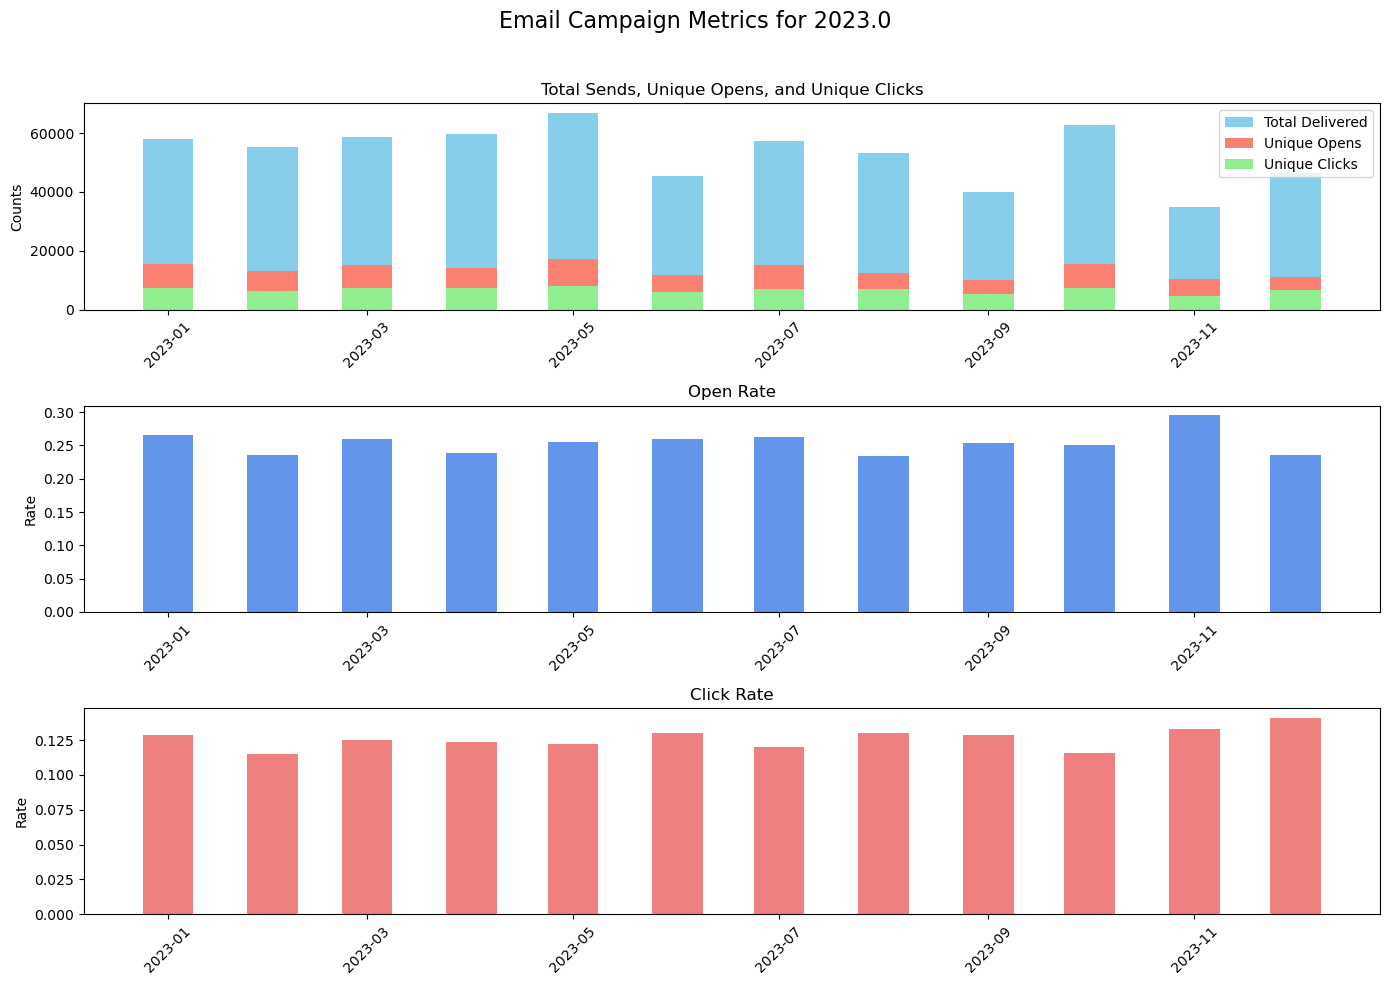

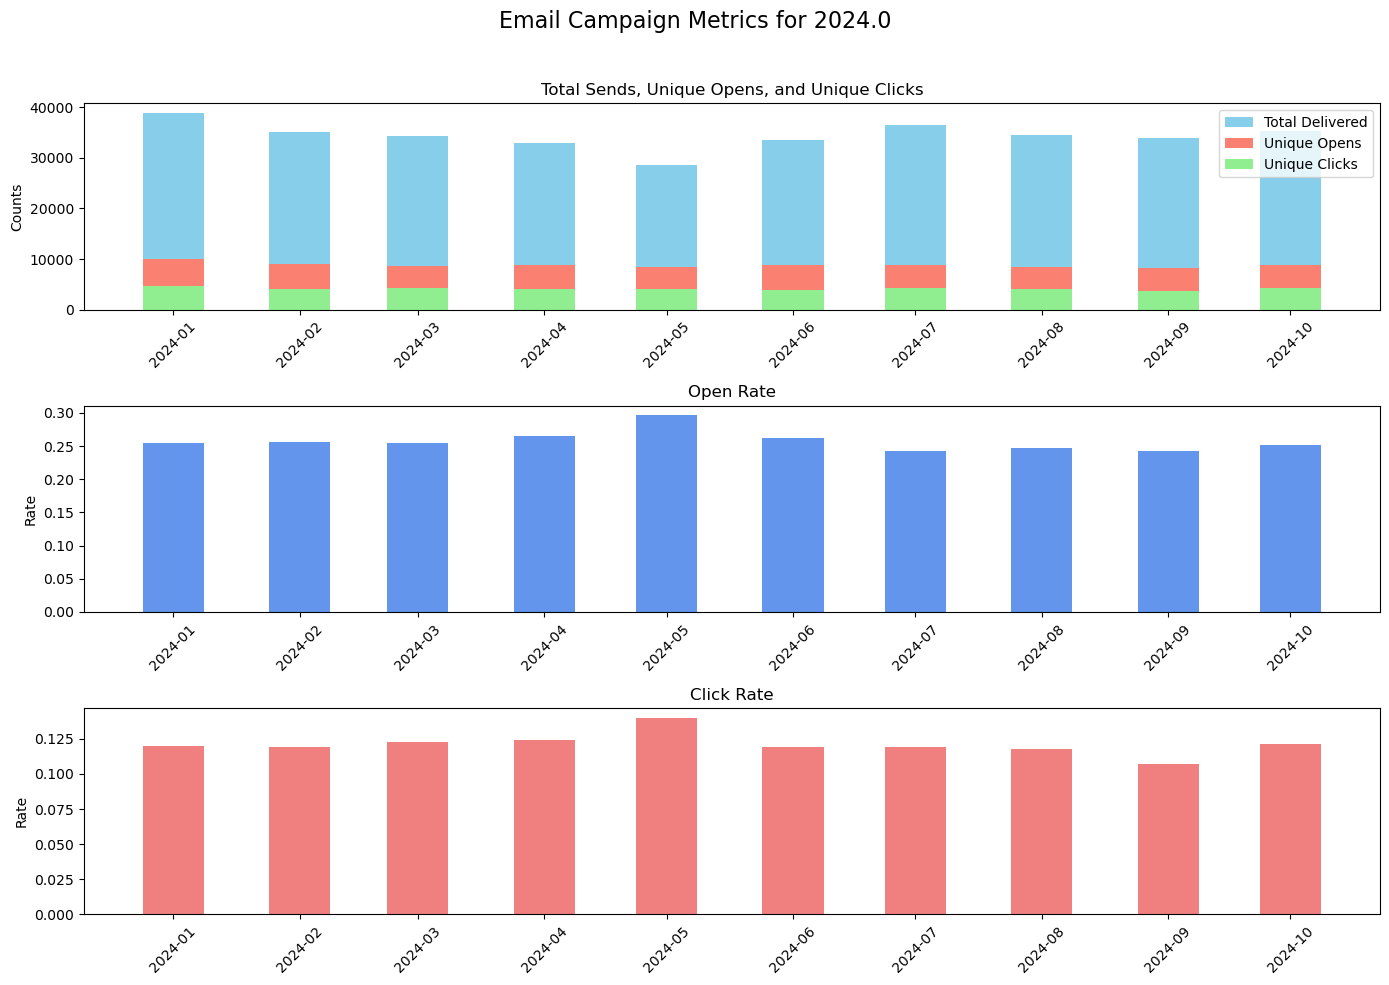

Results saved to updated_summary_with_metrics.csv


In [40]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
#df = pd.read_csv('Emailw.csv')

# Convert 'Email Sent Date' to datetime format
df['Email Sent Date'] = pd.to_datetime(df['Email Sent Date'], errors='coerce')

# Ensure 'Total Delivered' and other columns are numeric after removing commas or other symbols
for column in ['Total Delivered', 'Unique Opens Sum', 'Unique Clicks Sum']:
    df[column] = df[column].replace({',': ''}, regex=True)
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Check for NaN values in key columns and report percentages of missing data
missing_data = df[['Total Delivered', 'Unique Opens Sum', 'Unique Clicks Sum']].isna().mean() * 100
print("Percentage of missing data in key columns:\n", missing_data)

# Optionally fill missing values with zero (comment out if not needed)
df[['Total Delivered', 'Unique Opens Sum', 'Unique Clicks Sum']] = df[['Total Delivered', 'Unique Opens Sum', 'Unique Clicks Sum']].fillna(0)

# Sort the DataFrame by 'Email Sent Date'
df = df.sort_values(by='Email Sent Date')

# Extract year and month for grouping
df['Year-Month'] = df['Email Sent Date'].dt.strftime('%y-%b')
df['Year'] = df['Email Sent Date'].dt.year

# Calculate required metrics by grouping by 'Year-Month'
summary = df.groupby(['Year', 'Year-Month']).agg({
    'Total Delivered': 'sum',
    'Unique Opens Sum': 'sum',
    'Unique Clicks Sum': 'sum'
}).reset_index()

# Calculate Open Rate, Click Rate, and Engagement Rate (Open Rate + Click Rate)
summary['Open Rate'] = (summary['Unique Opens Sum'] / summary['Total Delivered']).round(3)
summary['Click Rate'] = (summary['Unique Clicks Sum'] / summary['Total Delivered']).round(3)
summary['Engagement Rate'] = (summary['Open Rate'] + summary['Click Rate']).round(3)

# Convert 'Year-Month' to a datetime format for consistent ordering
summary['Year-Month'] = pd.to_datetime(summary['Year-Month'], format='%y-%b')

# Plot bar graphs for each metric broken down by year
unique_years = summary['Year'].unique()
bar_width = 15  # Adjust bar width for thicker bars

for year in unique_years:
    year_data = summary[summary['Year'] == year]
    
    plt.figure(figsize=(14, 10))
    plt.suptitle(f"Email Campaign Metrics for {year}", fontsize=16)
    
    # Total Sends change total sends to "total delivered" Sum, Unique Opens Sum, Unique Clicks Sum
    plt.subplot(3, 1, 1)
    plt.bar(year_data['Year-Month'], year_data['Total Delivered'], width=bar_width, label='Total Delivered', color='skyblue')
    plt.bar(year_data['Year-Month'], year_data['Unique Opens Sum'], width=bar_width, label='Unique Opens', color='salmon')
    plt.bar(year_data['Year-Month'], year_data['Unique Clicks Sum'], width=bar_width, label='Unique Clicks', color='lightgreen')
    plt.title('Total Sends, Unique Opens, and Unique Clicks')
    plt.legend()
    plt.ylabel('Counts')
    
    # Open Rate
    plt.subplot(3, 1, 2)
    plt.bar(year_data['Year-Month'], year_data['Open Rate'], width=bar_width, color='cornflowerblue')
    plt.title('Open Rate')
    plt.ylabel('Rate')
    
    # Click Rate
    plt.subplot(3, 1, 3)
    plt.bar(year_data['Year-Month'], year_data['Click Rate'], width=bar_width, color='lightcoral')
    plt.title('Click Rate')
    plt.ylabel('Rate')
    
    # Customize the x-axis labels for better readability
    for ax in plt.gcf().axes:
        plt.sca(ax)
        plt.xticks(rotation=45)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
    plt.show()

# Save the resulting summary table to a CSV file
output_file = "updated_summary_with_metrics.csv"
summary.to_csv(output_file, index=False)

print(f"Results saved to {output_file}")



# Total Delivered

"Total delivered" refers to the number of emails successfully delivered to recipients' inboxes. This excludes any emails that bounced. The objective and threshold for deliverability are set at 98% and 100%, respectively.

### Example

Suppose we're sending an email to an audience segmented based on a newsletter signup form. For instance, if 100 people signed up via the form, we send the email to those 100 people. If the deliverability rate is 60%, it means 60 out of 100 emails reached inboxes, while 40% bounced. Bounces can be further segmented into hard and soft bounces:

- **Hard Bounces**: Often indicate fake email addresses, meaning some recipients may have entered invalid emails just to access the white paper or newsletter. To address this, we could implement real-time email validation in the signup form to ensure accurate entries.
- **Soft Bounces**: These typically occur due to temporary issues, like a full inbox or a server problem. Most email service providers (ESPs) will retry sending emails up to three times in these cases.

### Engagement Metrics

We monitor unique opens, unique clicks, total opens, and total clicks:

- **Unique Opens/Clicks**: Represents individual recipients interacting with the email. These are the primary metrics to evaluate initial engagement.
- **Total Opens/Clicks**: Indicates how many times the email was opened or clicked in total, providing insight into the content's engagement level. For instance, if unique clicks are 50 (50%) and total clicks are 100, it suggests strong engagement. Analyzing total clicks can help identify which content resonated most, guiding future email content strategies.


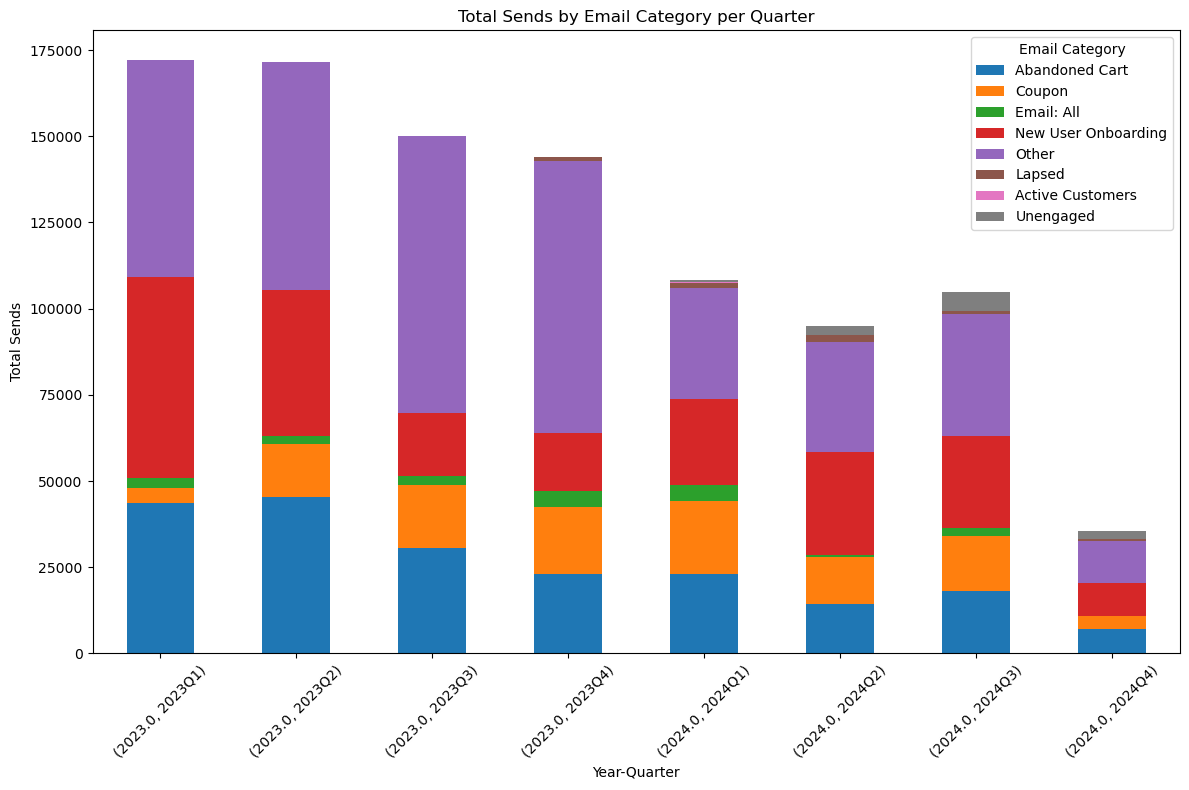

Email Category  Abandoned Cart   Coupon  Email: All  New User Onboarding  \
Year   Quarter                                                             
2023.0 2023Q1          43723.0   4207.0      2841.0              58447.0   
       2023Q2          45368.0  15509.0      2261.0              42340.0   
       2023Q3          30685.0  18166.0      2740.0              18243.0   
       2023Q4          23108.0  19475.0      4502.0              16968.0   
2024.0 2024Q1          23029.0  21304.0      4396.0              25042.0   
       2024Q2          14398.0  13633.0       645.0              29865.0   
       2024Q3          18019.0  16024.0      2221.0              26688.0   
       2024Q4           6988.0   3988.0         0.0               9327.0   

Email Category    Other  Lapsed  Active Customers  Unengaged  
Year   Quarter                                                
2023.0 2023Q1   62915.0     0.0               0.0        0.0  
       2023Q2   66196.0     0.0               0.0 

In [41]:


# Load and preprocess the data as before 
# df = pd.read_csv('Emailw.csv')
df['Email Sent Date'] = pd.to_datetime(df['Email Sent Date'], errors='coerce')
df['Year'] = df['Email Sent Date'].dt.year
df['Quarter'] = df['Email Sent Date'].dt.to_period('Q').astype(str)
for column in ['Total Delivered', 'Unique Opens Sum', 'Unique Clicks Sum']:
    df[column] = df[column].replace({',': ''}, regex=True)
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Group by Year, Quarter, and Email Category, summing 'Total Delivered'
summary = df.groupby(['Year', 'Quarter', 'Email Category'])['Total Delivered'].sum().unstack().fillna(0)

# Plotting
summary.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Total Sends by Email Category per Quarter")
plt.xlabel("Year-Quarter")
plt.ylabel("Total Sends")
plt.xticks(rotation=45)
plt.legend(title="Email Category")
plt.tight_layout()
plt.show()

print(summary)



### Trend Analysis

Monitoring these metrics month-over-month shows how performance trends, allowing us to make necessary adjustments. The goal is to exceed both industry benchmarks (e.g., retail, education) and our own internal monthly goals.

### Email Categories

Emails can be categorized based on the type, such as coupons, abandoned cart reminders, new user onboarding, and active customer updates. Each category performs differently, depending on audience segmentation (e.g., behavior, preferences, funnel stage). Tailoring strategies for each category can improve performance across different audience segments.







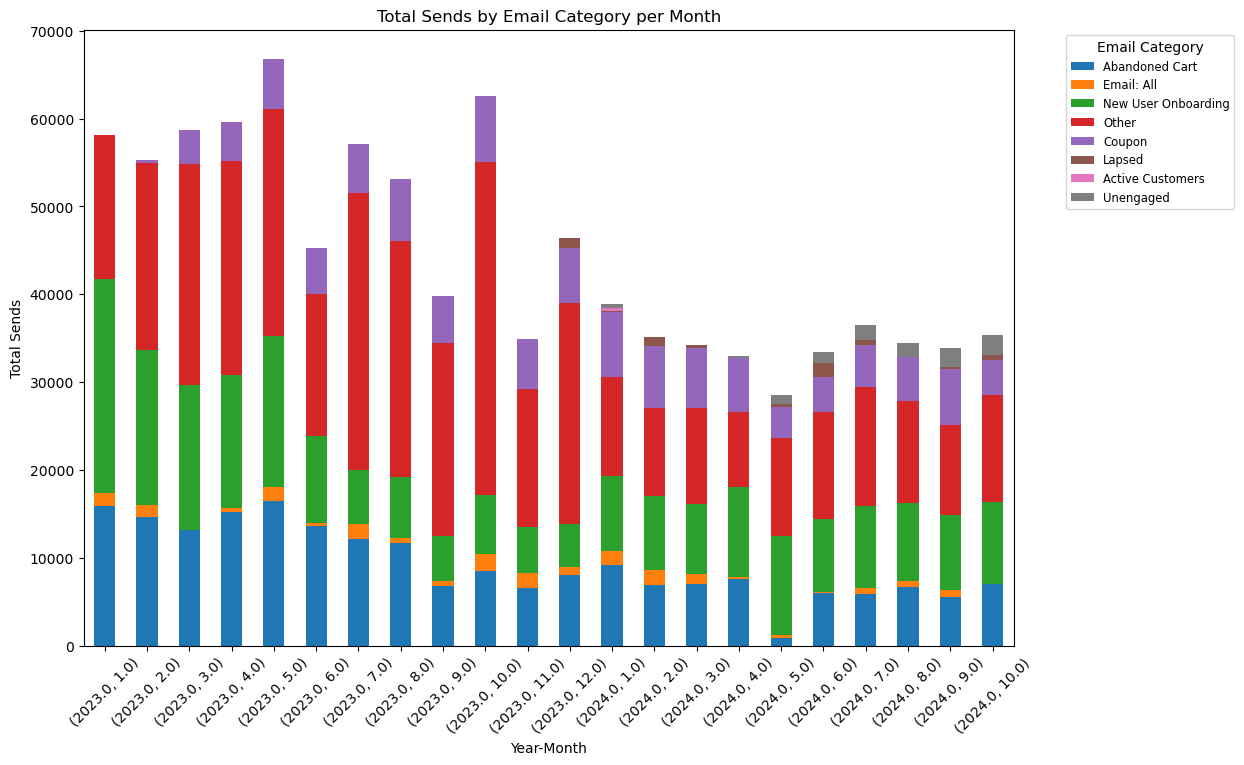

Email Category  Abandoned Cart  Email: All  New User Onboarding    Other  \
Year   Month                                                               
2023.0 1.0             15916.0      1490.0              24304.0  16456.0   
       2.0             14648.0      1351.0              17644.0  21260.0   
       3.0             13159.0         0.0              16499.0  25199.0   
       4.0             15224.0       394.0              15230.0  24279.0   
       5.0             16506.0      1583.0              17131.0  25808.0   
       6.0             13638.0       284.0               9979.0  16109.0   
       7.0             12127.0      1695.0               6175.0  31477.0   
       8.0             11722.0       525.0               6968.0  26879.0   
       9.0              6836.0       520.0               5100.0  21952.0   
       10.0             8538.0      1868.0               6736.0  37890.0   
       11.0             6563.0      1731.0               5259.0  15643.0   
       12.0 

In [42]:


# Load and preprocess the data
# df = pd.read_csv('Emailw.csv')
df['Email Sent Date'] = pd.to_datetime(df['Email Sent Date'], errors='coerce')
df['Year'] = df['Email Sent Date'].dt.year
df['Quarter'] = df['Email Sent Date'].dt.to_period('Q').astype(str)
df['Month'] = df['Email Sent Date'].dt.month  # Extract month if needed

# Convert relevant columns to numeric
for column in ['Total Delivered', 'Unique Opens Sum', 'Unique Clicks Sum']:
    df[column] = df[column].replace({',': ''}, regex=True)
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Group by Year, Month, and Email Category, summing 'Total Delivered'
summary = df.groupby(['Year', 'Month', 'Email Category'])['Total Delivered'].sum().unstack().fillna(0)

# Plotting
summary.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Total Sends by Email Category per Month")
plt.xlabel("Year-Month")
plt.ylabel("Total Sends")
plt.xticks(rotation=45)

# Adjust legend position and size
plt.legend(title="Email Category", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
#plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for legend

plt.show()

# Display the summary table
print(summary)

